In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("trichupalli.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,24.64,93.88,0.00,98.66,3.40
1,2011,6,1,6,25.87,86.75,0.00,98.72,3.56
2,2011,6,1,7,27.86,76.19,0.10,98.77,5.51
3,2011,6,1,8,29.87,65.44,0.09,98.80,6.11
4,2011,6,1,9,31.58,57.12,0.27,98.78,5.87
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,26.96,79.06,0.00,98.65,4.00
86204,2021,4,1,1,26.69,79.88,0.00,98.59,3.93
86205,2021,4,1,2,26.42,80.81,0.00,98.57,3.82
86206,2021,4,1,3,26.17,82.00,0.00,98.58,3.73


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


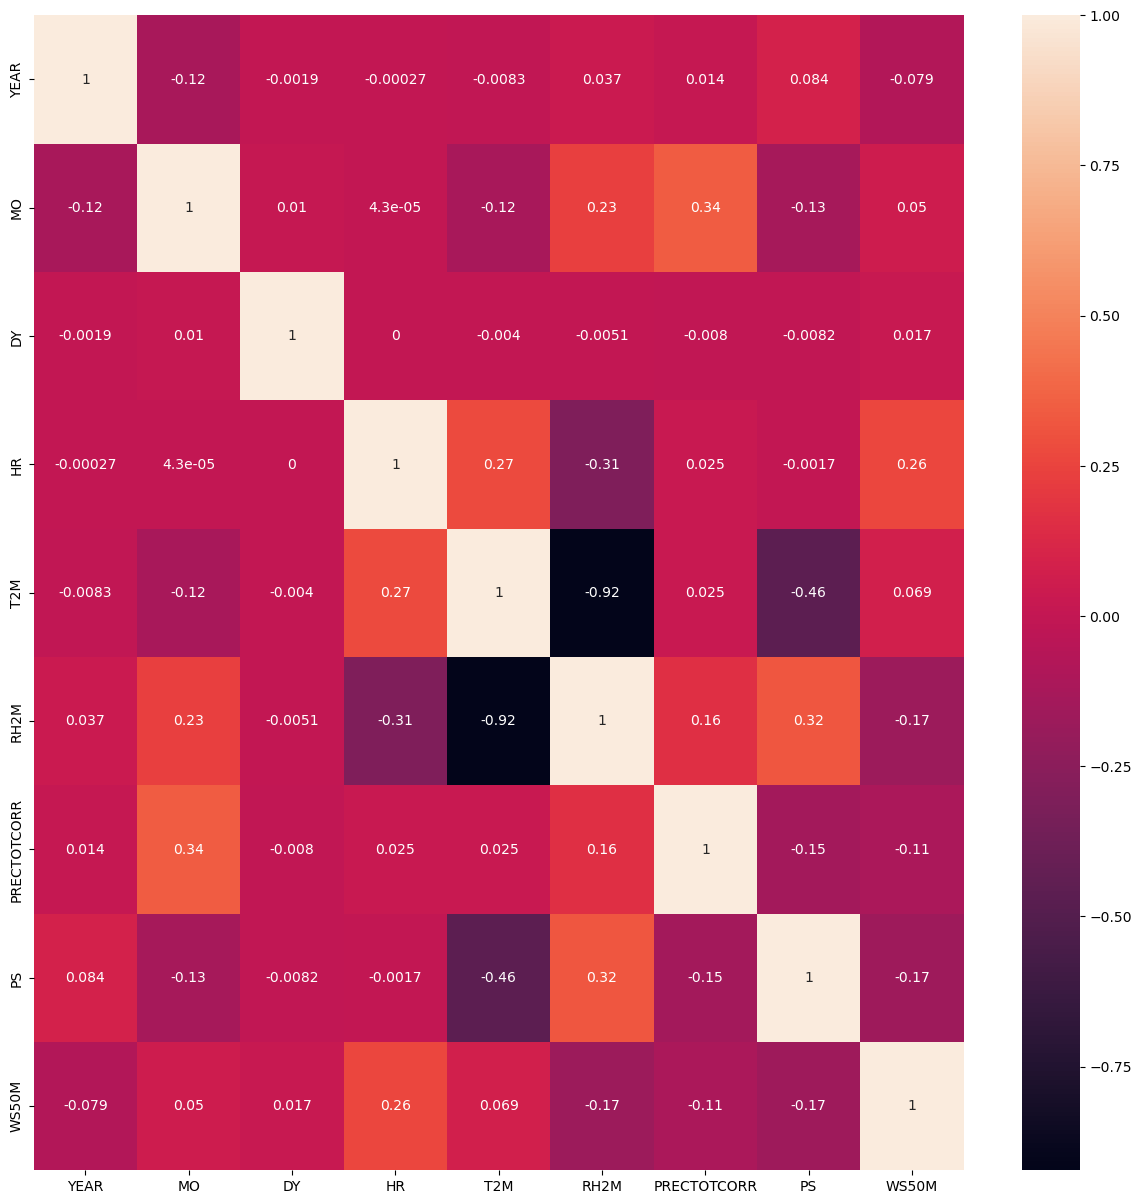

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

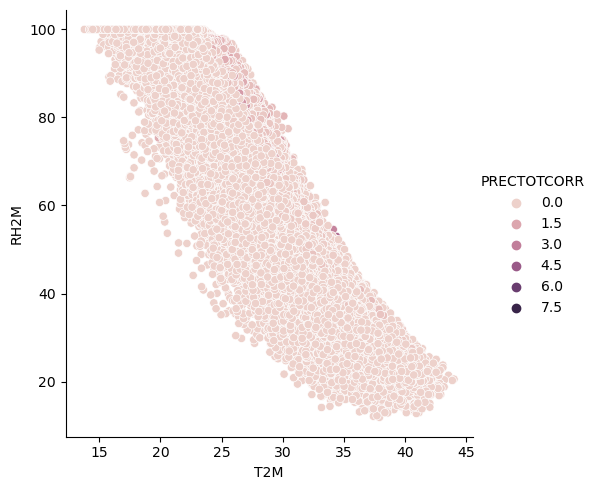

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


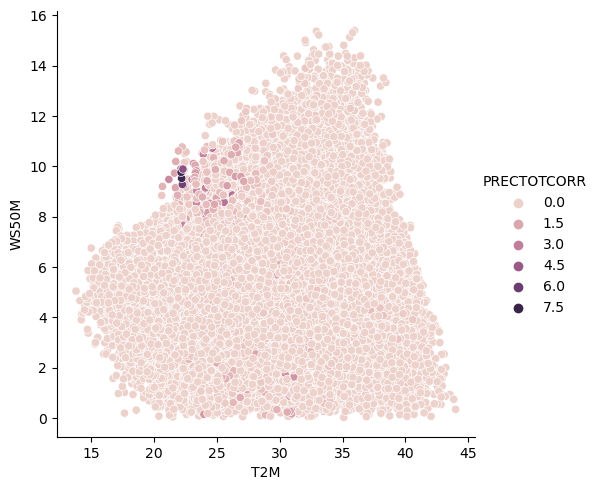

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


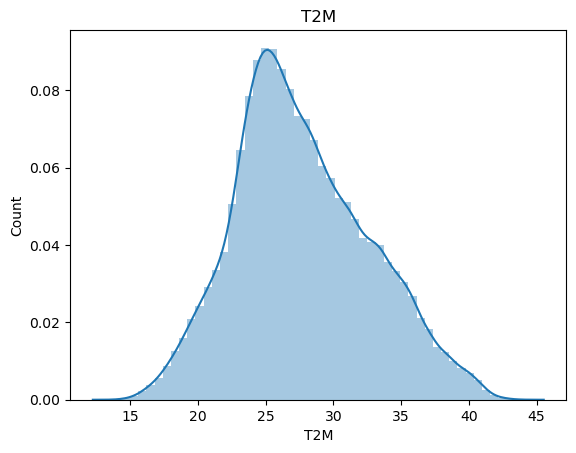

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


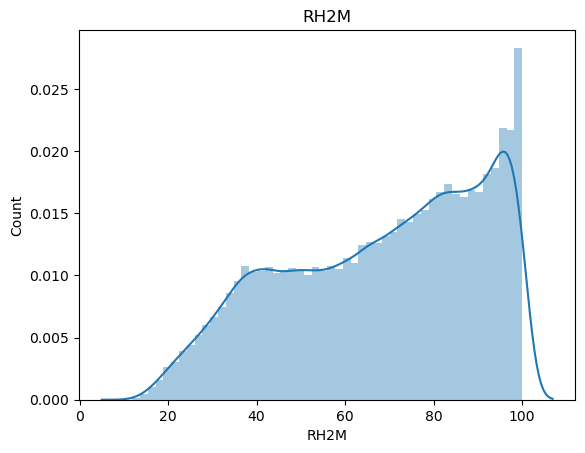

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


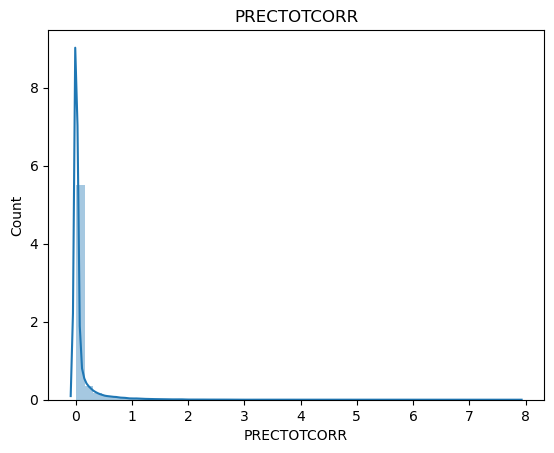

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


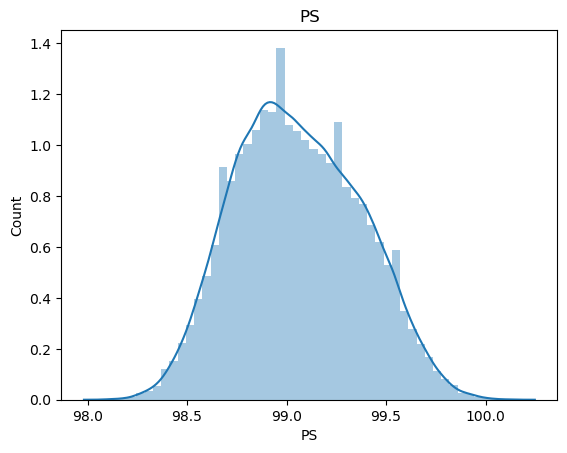

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


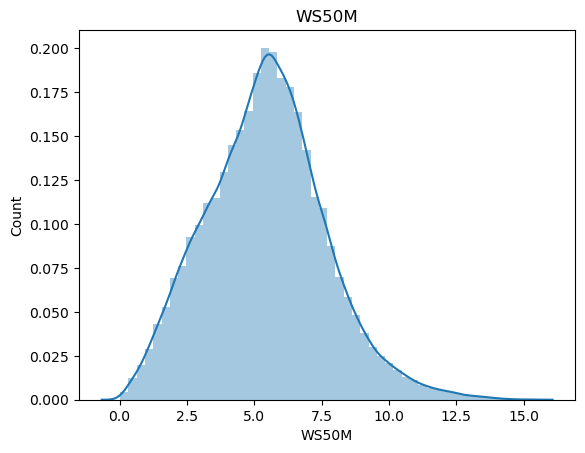

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

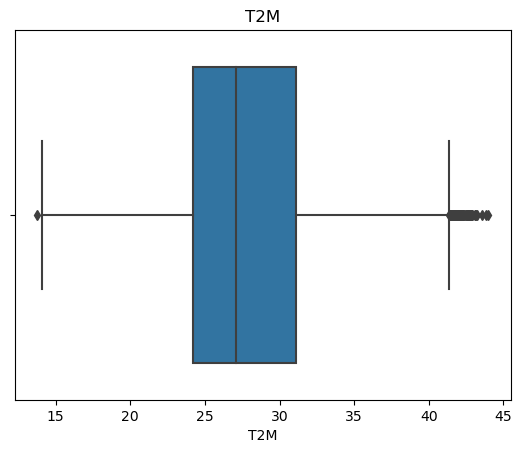

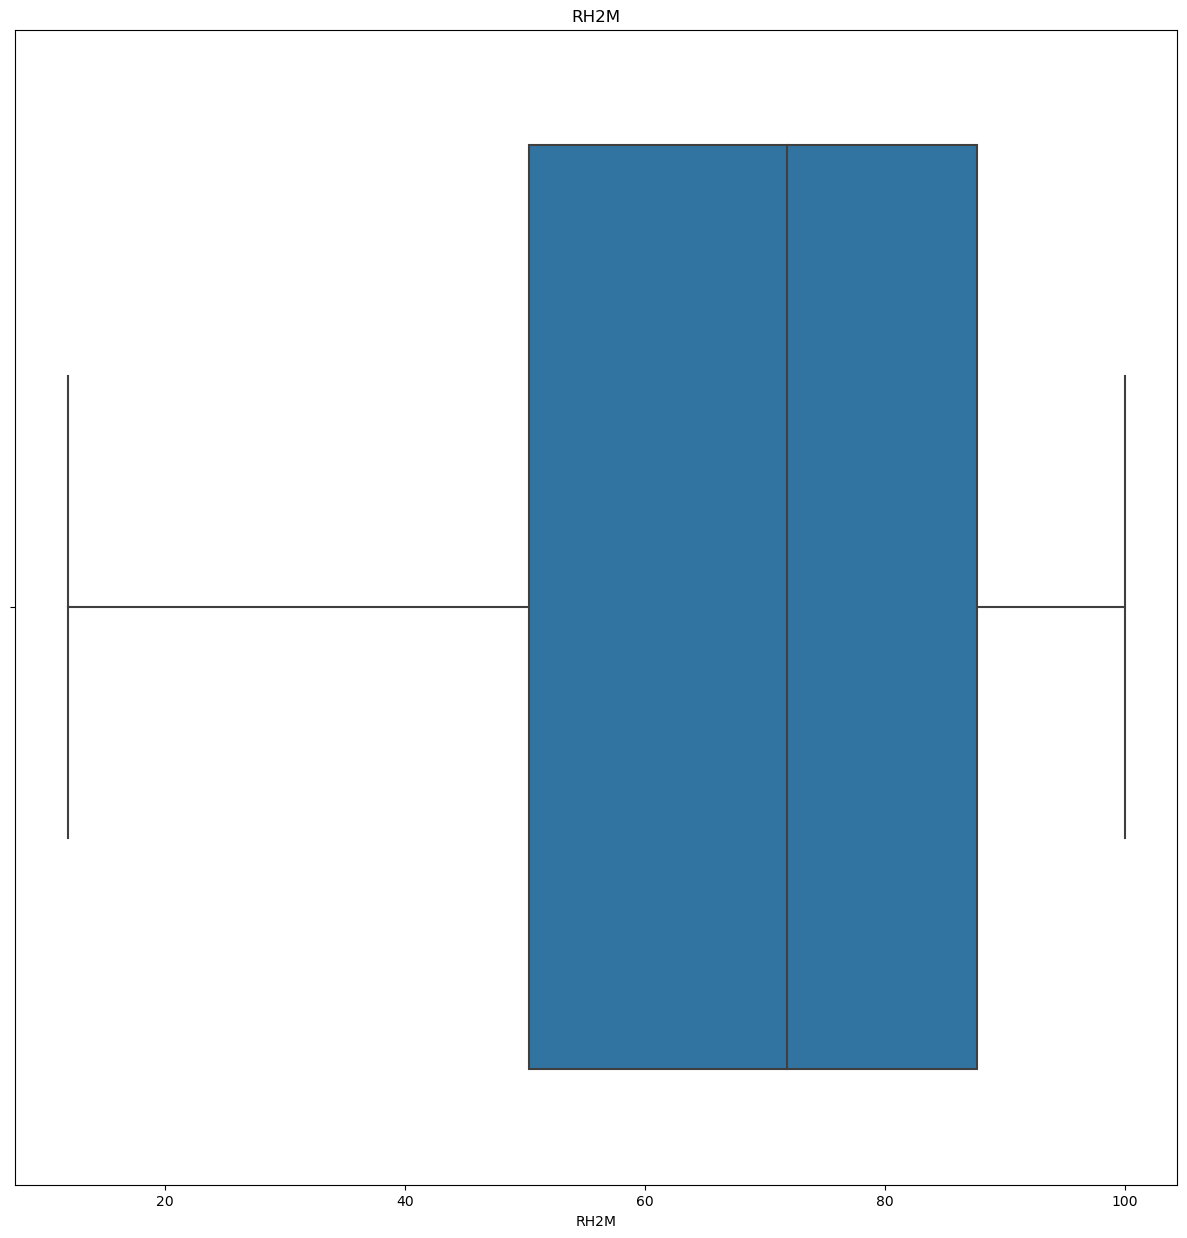

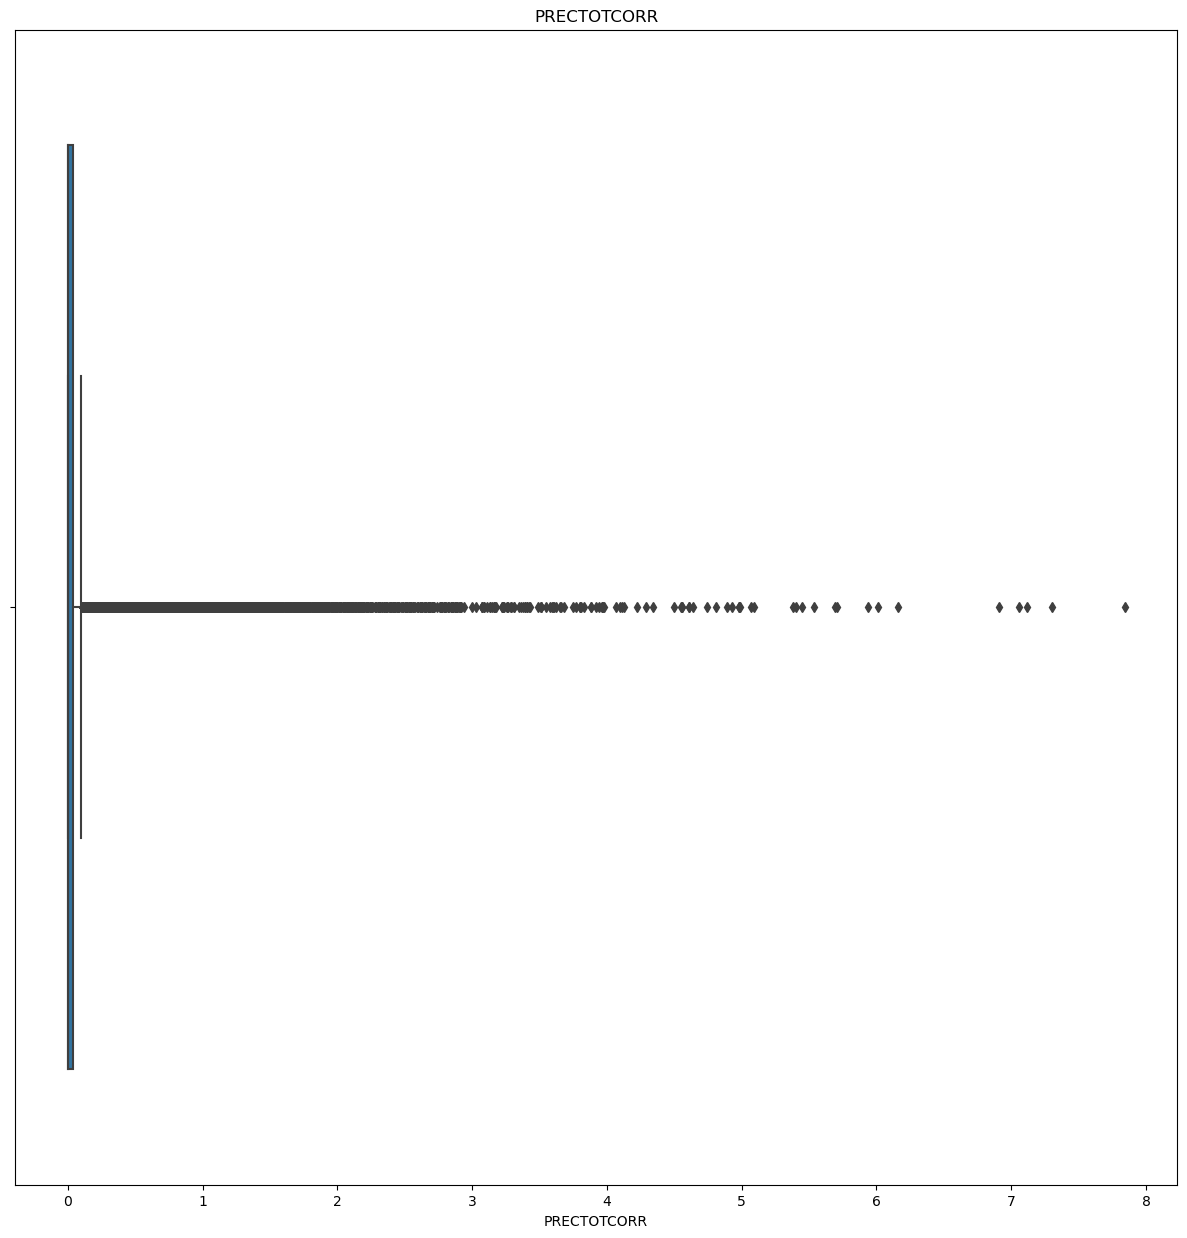

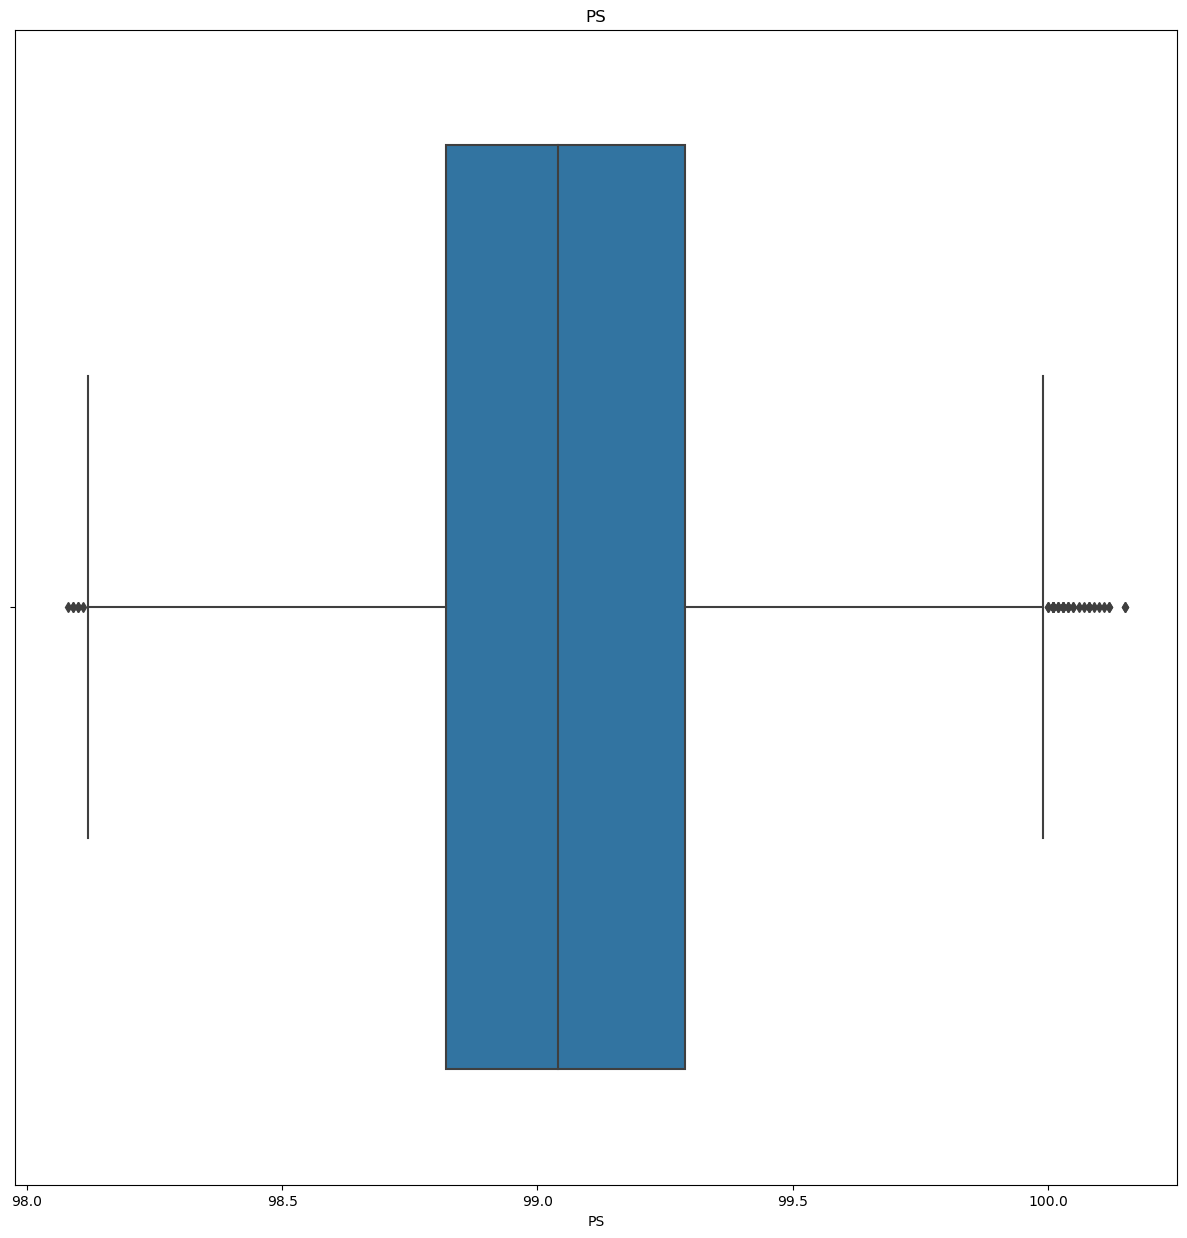

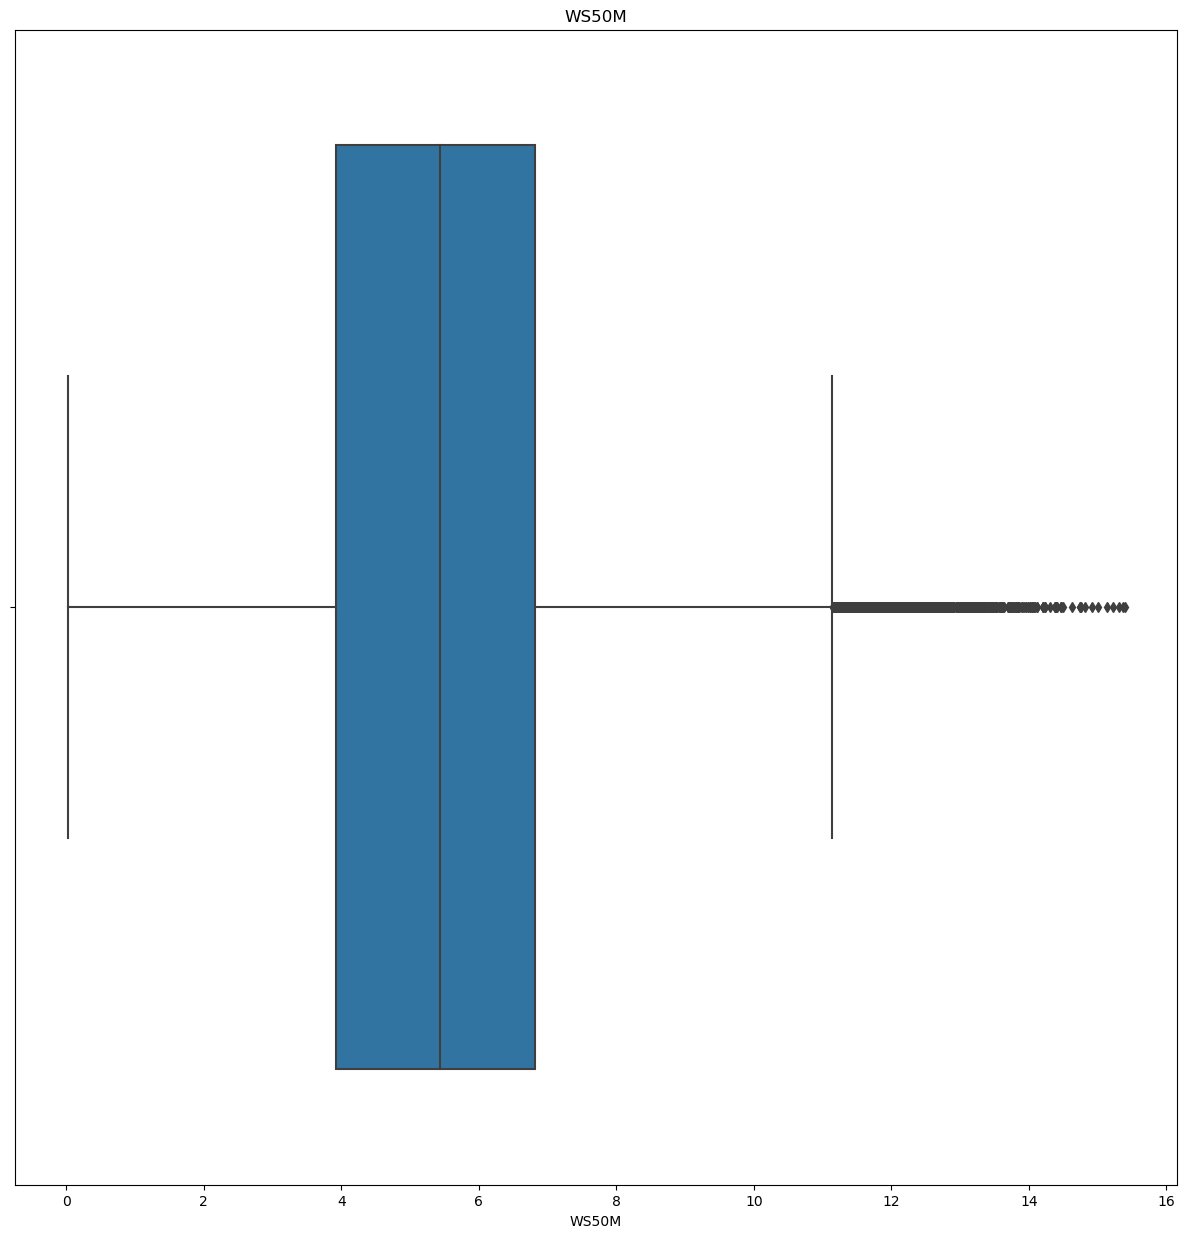

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[24.64 25.87 27.86 ... 14.79 15.81 15.41]
<class 'numpy.ndarray'>
[0.   0.1  0.09 0.27 0.44 0.56 0.62 0.65 0.47 0.33 0.22 0.13 0.04 0.01
 0.02 0.03 0.08 0.15 0.18 0.21 0.16 0.12 0.06 0.37 0.49 0.39 0.28 0.14
 0.07 0.05 0.19 0.11 0.45 0.75 0.6  0.29 0.36 1.02 1.25 1.   0.69 0.68
 0.64 0.4  0.54 0.5  0.46 0.32 0.2  0.25 0.23 0.17 1.43 3.68 4.61 3.98
 5.45 1.85 0.42 0.66 0.9  0.96 0.81 0.41 0.26 0.31 0.34 0.35 0.55 0.73
 0.24 0.89 1.32 1.13 1.29 1.22 0.63 0.79 0.38 0.86 1.49 1.61 1.54 1.12
 0.61 0.53 0.52 0.43 0.3  1.38 1.87 2.24 1.28 1.07 0.87 1.2  1.21 1.42
 1.47 1.23 0.59 0.99 0.74 0.48 0.77 0.85 1.24 1.68 2.18 2.09 1.58 0.98
 1.09 0.57 0.78 0.95 1.15 0.71 0.82 2.55 5.69 7.12 5.54 3.94 3.61 2.91
 2.8  2.44 2.06 1.26 0.58 1.55 1.97 2.   1.67 0.51 1.01 1.17 0.83 1.6
 2.87 4.13 4.64 3.43 2.32 1.82 1.69 1.48 1.83 1.41 2.84 2.3  1.63 0.67
 0.97 1.34 1.51 1.44 0.76 1.05 0.7  0.72 0.94 1.18 1.04 1.98 3.16 3.39
 3.18 2.68 2.11 1.79 1.3  1.1  1.08 0.88 0.92 1.71 1.86 1.5  1.27 1.06
 1.03 0.91 0

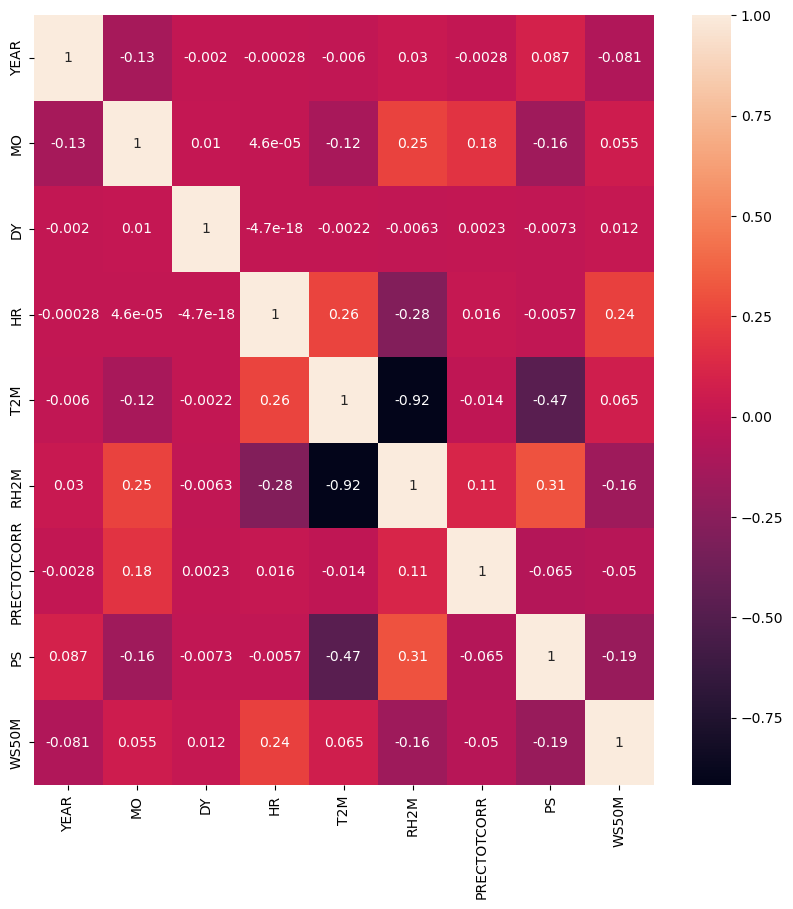

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


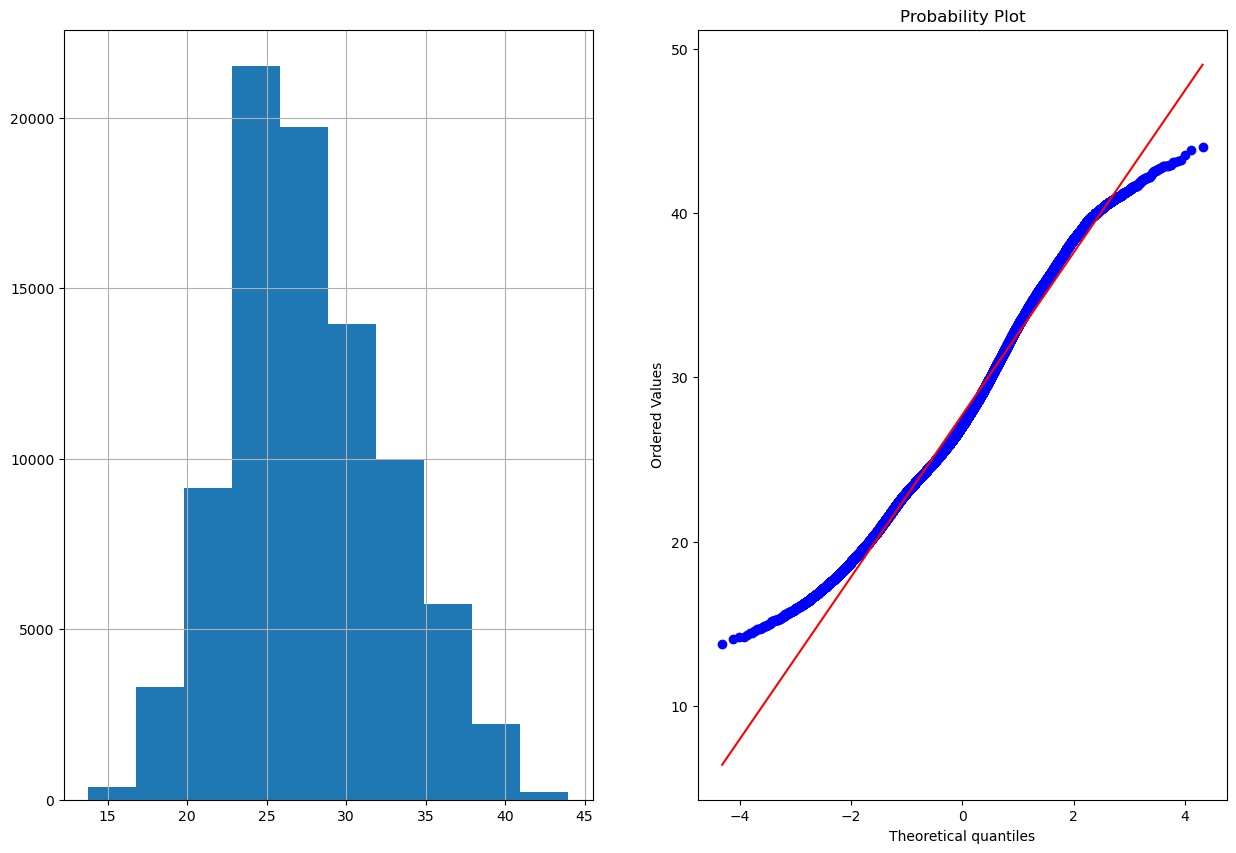

RH2M


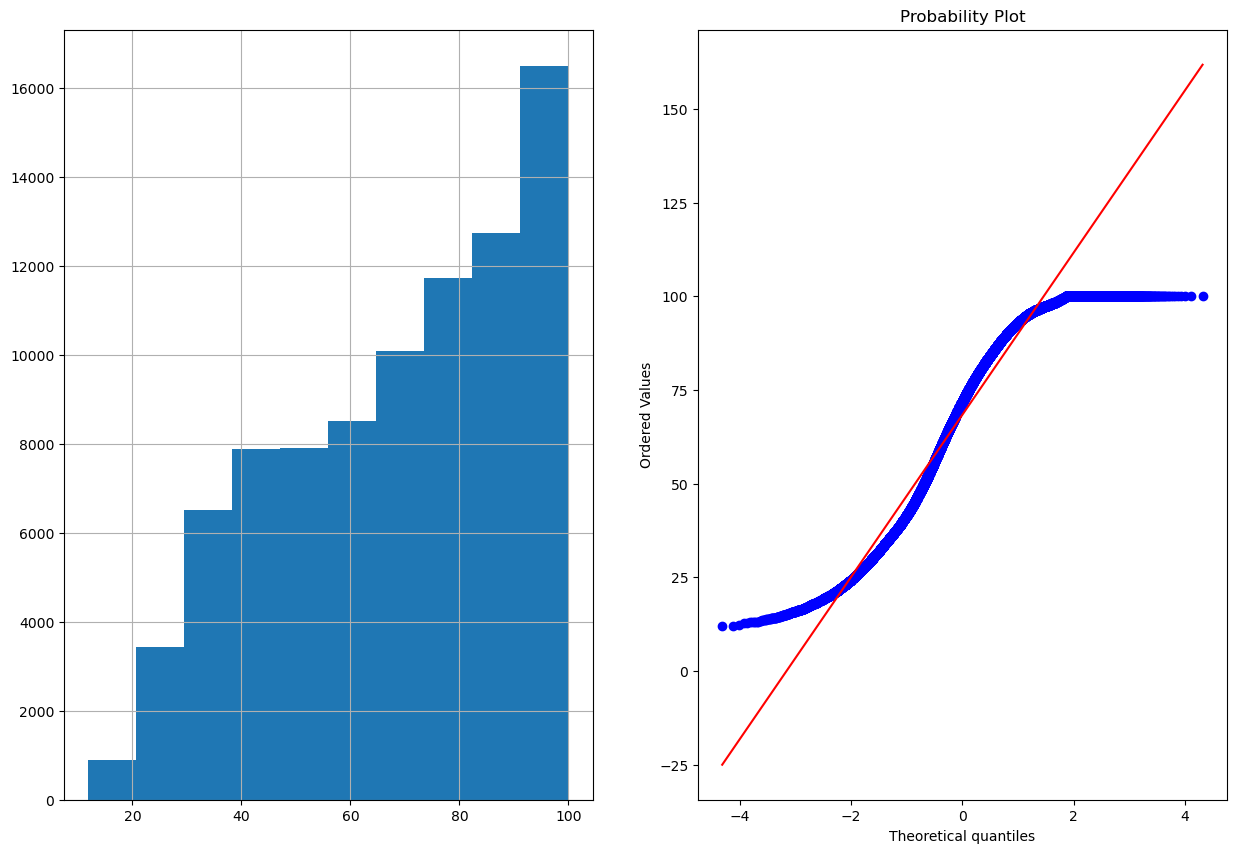

PRECTOTCORR


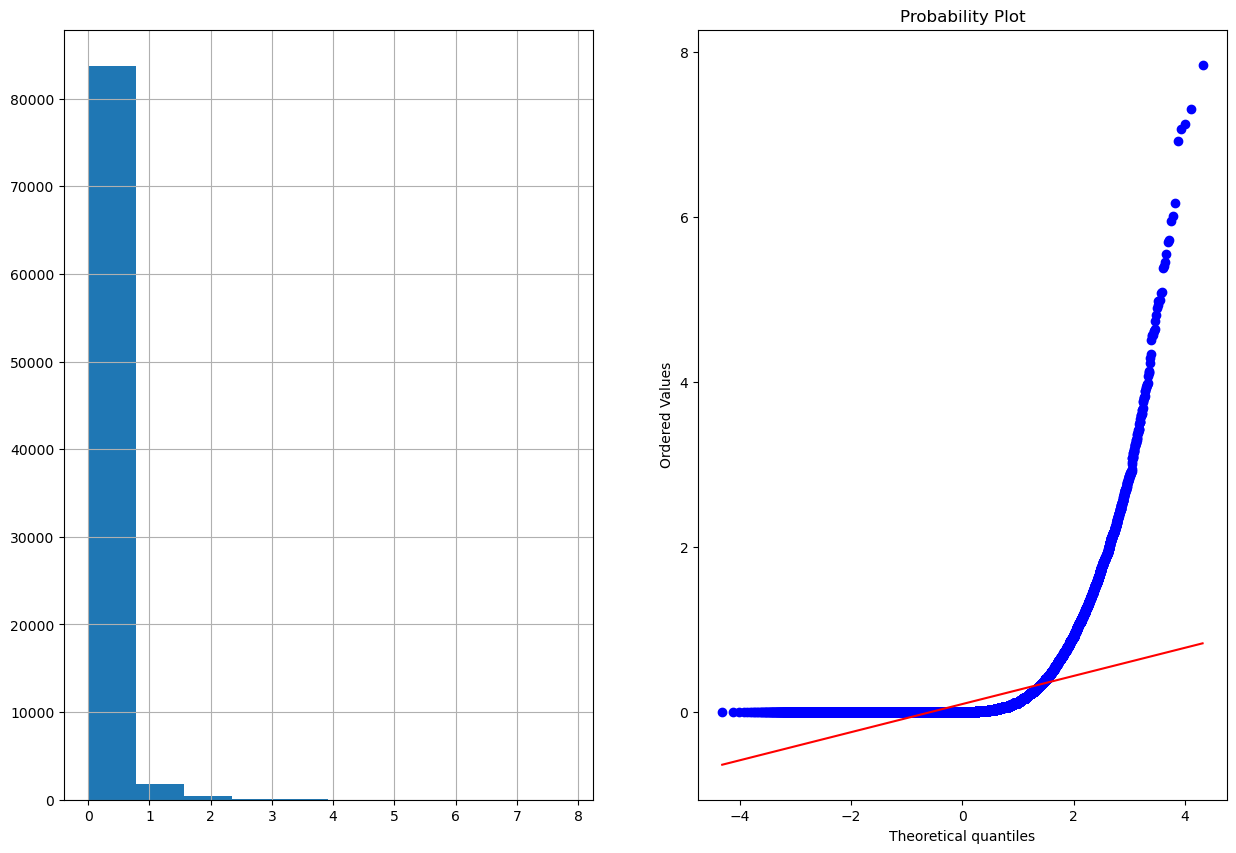

PS


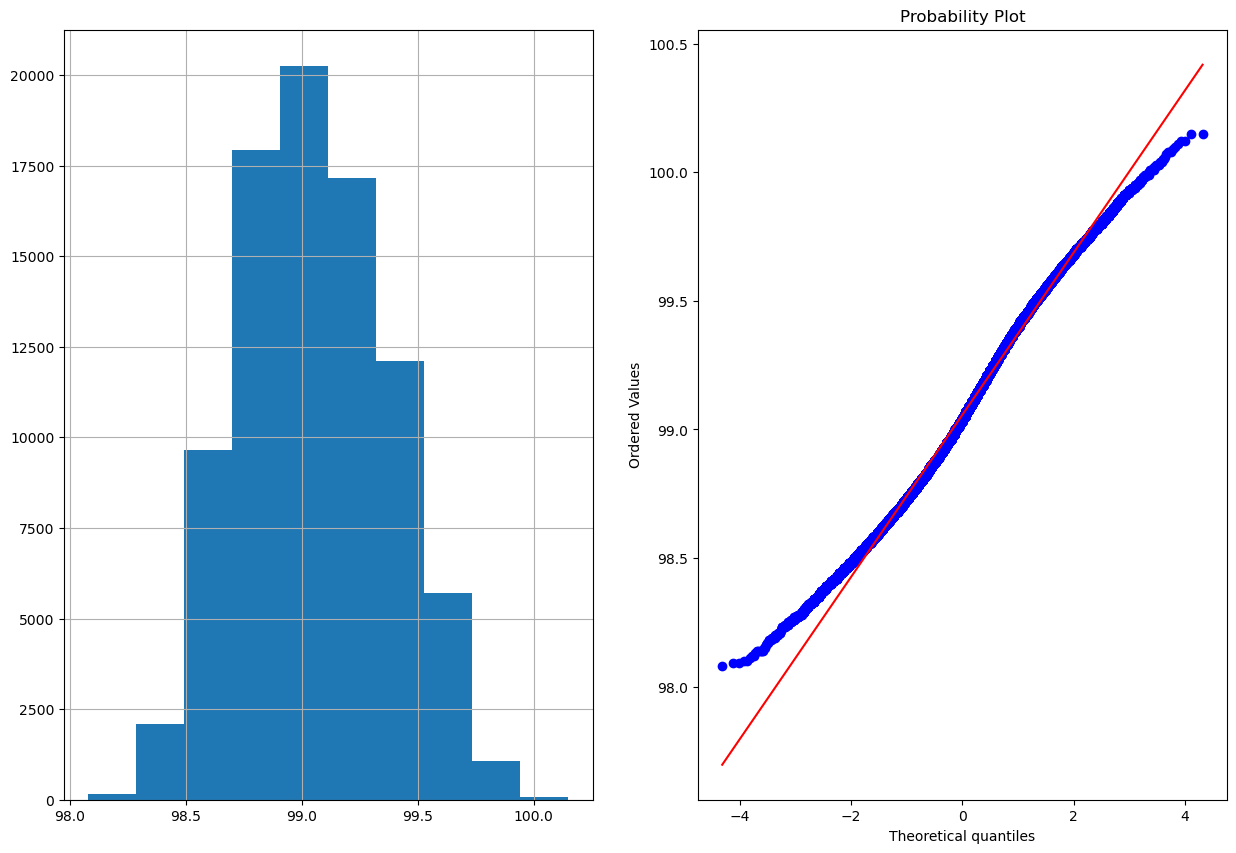

WS50M


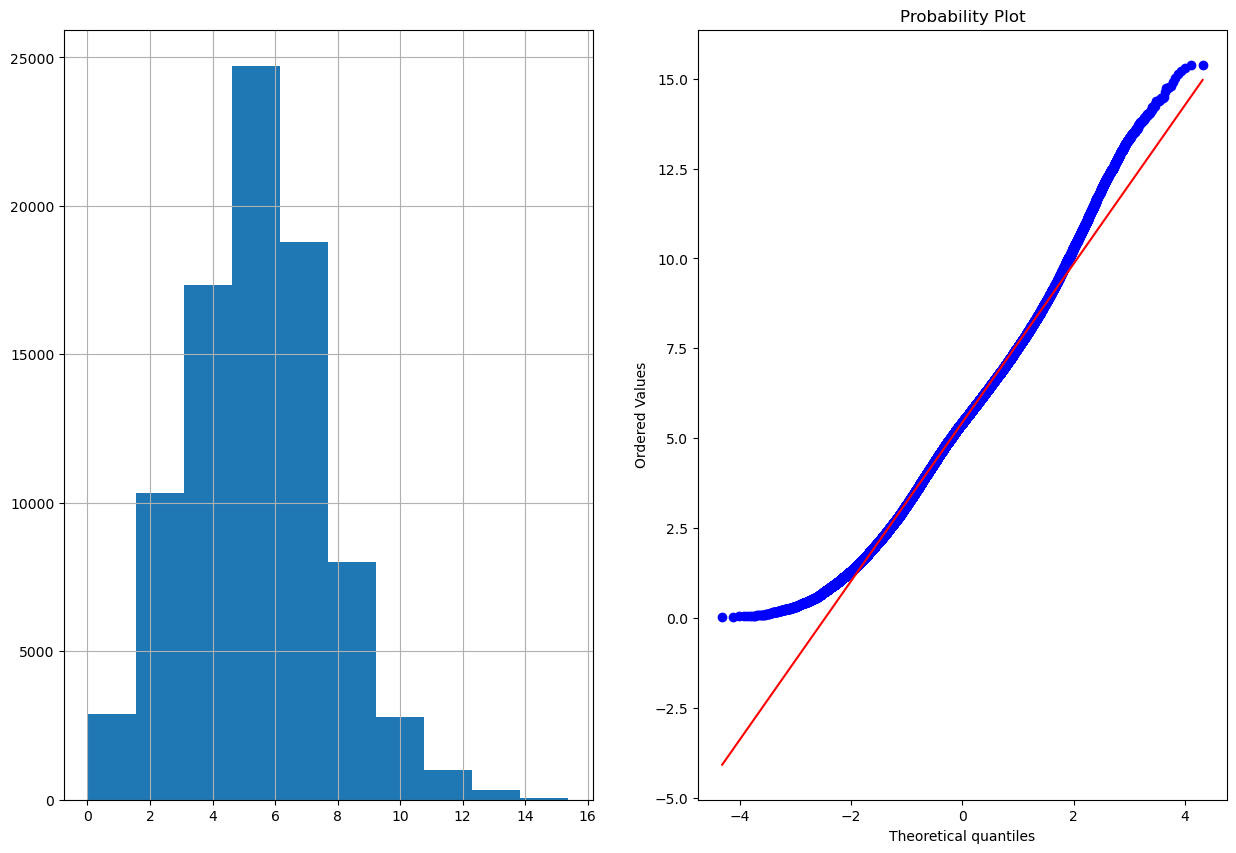

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.  , 0.1 , 0.09, 0.27, 0.44, 0.56, 0.62, 0.65, 0.47, 0.33, 0.22,
       0.13, 0.04, 0.01, 0.02, 0.03, 0.08, 0.15, 0.18, 0.21, 0.16, 0.12,
       0.06, 0.37, 0.49, 0.39, 0.28, 0.14, 0.07, 0.05, 0.19, 0.11, 0.45,
       0.75, 0.6 , 0.29, 0.36, 1.02, 1.25, 1.  , 0.69, 0.68, 0.64, 0.4 ,
       0.54, 0.5 , 0.46, 0.32, 0.2 , 0.25, 0.23, 0.17, 1.43, 3.68, 4.61,
       3.98, 5.45, 1.85, 0.42, 0.66, 0.9 , 0.96, 0.81, 0.41, 0.26, 0.31,
       0.34, 0.35, 0.55, 0.73, 0.24, 0.89, 1.32, 1.13, 1.29, 1.22, 0.63,
       0.79, 0.38, 0.86, 1.49, 1.61, 1.54, 1.12, 0.61, 0.53, 0.52, 0.43,
       0.3 , 1.38, 1.87, 2.24, 1.28, 1.07, 0.87, 1.2 , 1.21, 1.42, 1.47,
       1.23, 0.59, 0.99, 0.74, 0.48, 0.77, 0.85, 1.24, 1.68, 2.18, 2.09,
       1.58, 0.98, 1.09, 0.57, 0.78, 0.95, 1.15, 0.71, 0.82, 2.55, 5.69,
       7.12, 5.54, 3.94, 3.61, 2.91, 2.8 , 2.44, 2.06, 1.26, 0.58, 1.55,
       1.97, 2.  , 1.67, 0.51, 1.01, 1.17, 0.83, 1.6 , 2.87, 4.13, 4.64,
       3.43, 2.32, 1.82, 1.69, 1.48, 1.83, 1.41, 2.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,24.64,1.0
1,25.87,1.0
2,27.86,0.0
3,29.87,0.0
4,31.58,0.0
...,...,...
86203,26.96,1.0
86204,26.69,1.0
86205,26.42,1.0
86206,26.17,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,24.64,1.0,5
1,25.87,1.0,6
2,27.86,0.0,7
3,29.87,0.0,8
4,31.58,0.0,9
...,...,...,...
86203,26.96,1.0,0
86204,26.69,1.0,1
86205,26.42,1.0,2
86206,26.17,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,24.64,1.0,5,1
1,25.87,1.0,6,1
2,27.86,0.0,7,1
3,29.87,0.0,8,1
4,31.58,0.0,9,1
...,...,...,...,...
86203,26.96,1.0,0,1
86204,26.69,1.0,1,1
86205,26.42,1.0,2,1
86206,26.17,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,24.64,1.0,5,1,6
1,25.87,1.0,6,1,6
2,27.86,0.0,7,1,6
3,29.87,0.0,8,1,6
4,31.58,0.0,9,1,6
...,...,...,...,...,...
86203,26.96,1.0,0,1,4
86204,26.69,1.0,1,1,4
86205,26.42,1.0,2,1,4
86206,26.17,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,24.64,1.0,5,1,6,2011
1,25.87,1.0,6,1,6,2011
2,27.86,0.0,7,1,6,2011
3,29.87,0.0,8,1,6,2011
4,31.58,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,26.96,1.0,0,1,4,2021
86204,26.69,1.0,1,1,4,2021
86205,26.42,1.0,2,1,4,2021
86206,26.17,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,24.64,1.0,5,1,6,2011
1,25.87,1.0,6,1,6,2011
2,27.86,0.0,7,1,6,2011
3,29.87,0.0,8,1,6,2011
4,31.58,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,26.96,1.0,0,1,4,2021
86204,26.69,1.0,1,1,4,2021
86205,26.42,1.0,2,1,4,2021
86206,26.17,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,24.64,1.0,5,1,6,2011,93.88
1,25.87,1.0,6,1,6,2011,86.75
2,27.86,0.0,7,1,6,2011,76.19
3,29.87,0.0,8,1,6,2011,65.44
4,31.58,0.0,9,1,6,2011,57.12
...,...,...,...,...,...,...,...
86203,26.96,1.0,0,1,4,2021,79.06
86204,26.69,1.0,1,1,4,2021,79.88
86205,26.42,1.0,2,1,4,2021,80.81
86206,26.17,1.0,3,1,4,2021,82.00


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,24.64,1.0,5,1,6,2011,93.88,3.40
1,25.87,1.0,6,1,6,2011,86.75,3.56
2,27.86,0.0,7,1,6,2011,76.19,5.51
3,29.87,0.0,8,1,6,2011,65.44,6.11
4,31.58,0.0,9,1,6,2011,57.12,5.87
...,...,...,...,...,...,...,...,...
86203,26.96,1.0,0,1,4,2021,79.06,4.00
86204,26.69,1.0,1,1,4,2021,79.88,3.93
86205,26.42,1.0,2,1,4,2021,80.81,3.82
86206,26.17,1.0,3,1,4,2021,82.00,3.73


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,24.64,1.0,5,1,6,2011,93.88,3.40,3.40
1,25.87,1.0,6,1,6,2011,86.75,3.56,3.56
2,27.86,0.0,7,1,6,2011,76.19,5.51,5.51
3,29.87,0.0,8,1,6,2011,65.44,6.11,6.11
4,31.58,0.0,9,1,6,2011,57.12,5.87,5.87
...,...,...,...,...,...,...,...,...,...
86203,26.96,1.0,0,1,4,2021,79.06,4.00,4.00
86204,26.69,1.0,1,1,4,2021,79.88,3.93,3.93
86205,26.42,1.0,2,1,4,2021,80.81,3.82,3.82
86206,26.17,1.0,3,1,4,2021,82.00,3.73,3.73


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

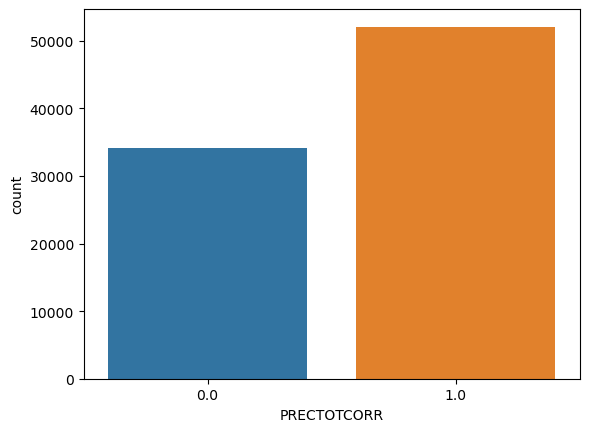

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("trichupalli-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,24.64,1.0,5,1,6,2011,93.88,3.40,3.40
1,25.87,1.0,6,1,6,2011,86.75,3.56,3.56
2,27.86,0.0,7,1,6,2011,76.19,5.51,5.51
3,29.87,0.0,8,1,6,2011,65.44,6.11,6.11
4,31.58,0.0,9,1,6,2011,57.12,5.87,5.87
...,...,...,...,...,...,...,...,...,...
86203,26.96,1.0,0,1,4,2021,79.06,4.00,4.00
86204,26.69,1.0,1,1,4,2021,79.88,3.93,3.93
86205,26.42,1.0,2,1,4,2021,80.81,3.82,3.82
86206,26.17,1.0,3,1,4,2021,82.00,3.73,3.73
